# Super Store sales Prediction

#### Import Important Libraries

In [90]:
import numpy as np, pandas as pd
import seaborn as sns, matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

### Importing Dataset

In [91]:
df=pd.read_csv("Train (1).csv")

In [92]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [93]:
df.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976
8522,DRG01,14.800,Low Fat,0.044878,Soft Drinks,75.4670,OUT046,1997,Small,Tier 1,Supermarket Type1,765.6700


In [94]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [96]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


## Data Cleaning

In [97]:

clean=[i for i in df.columns if df[i].isnull().any()]
clean

['Item_Weight', 'Outlet_Size']

In [98]:
round((df[clean].isnull().sum()/len(df))*100,2).sort_values(ascending=False)
    

Outlet_Size    28.28
Item_Weight    17.17
dtype: float64

In [99]:
from sklearn.impute import SimpleImputer

In [100]:
imput=SimpleImputer(strategy='most_frequent')

In [101]:
x=df[["Outlet_Size"]]
df["Outlet_Size"]=pd.DataFrame(imput.fit_transform(x))
df["Outlet_Size"].head()

0    Medium
1    Medium
2    Medium
3    Medium
4      High
Name: Outlet_Size, dtype: object

In [102]:
y=df[["Item_Weight"]]
imput=SimpleImputer(strategy='median')
df["Item_Weight"]=pd.DataFrame(imput.fit_transform(y))
df["Item_Weight"].head()

0     9.30
1     5.92
2    17.50
3    19.20
4     8.93
Name: Item_Weight, dtype: float64

In [103]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [104]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


## EDA

AxesSubplot(0.125,0.125;0.775x0.755)


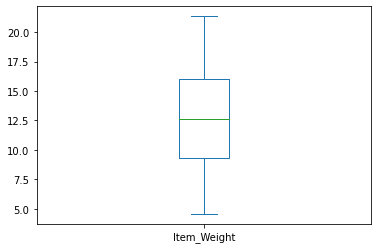

AxesSubplot(0.125,0.125;0.775x0.755)


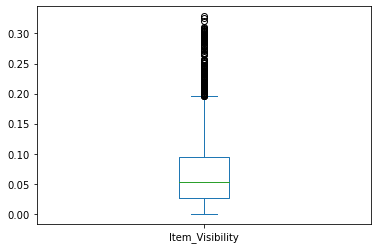

AxesSubplot(0.125,0.125;0.775x0.755)


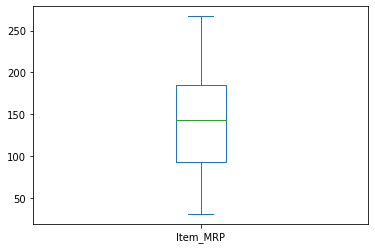

AxesSubplot(0.125,0.125;0.775x0.755)


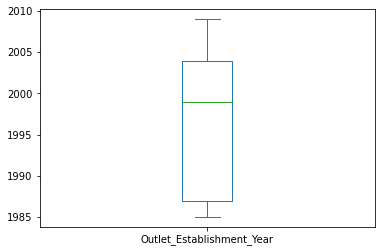

AxesSubplot(0.125,0.125;0.775x0.755)


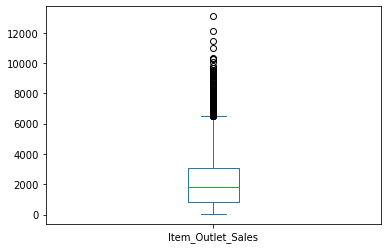

In [105]:
# for all quantitative variable
for i in df.describe().columns:
    print(df[i].plot.box())
    plt.show()

In [106]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [107]:
df.columns
df1=df.iloc[:,1:]
df1.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


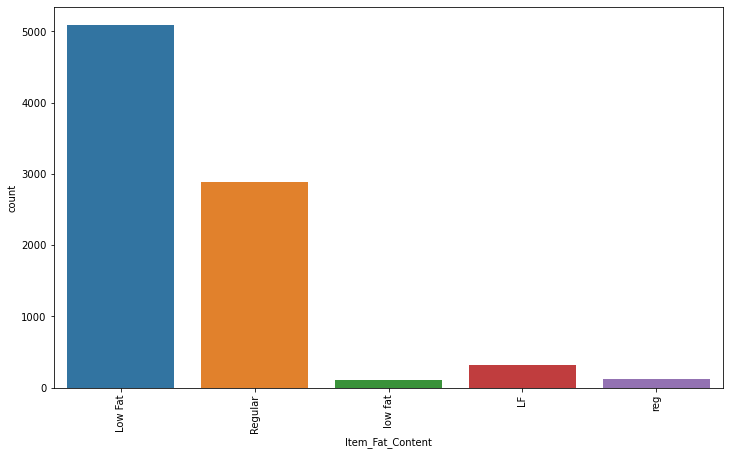

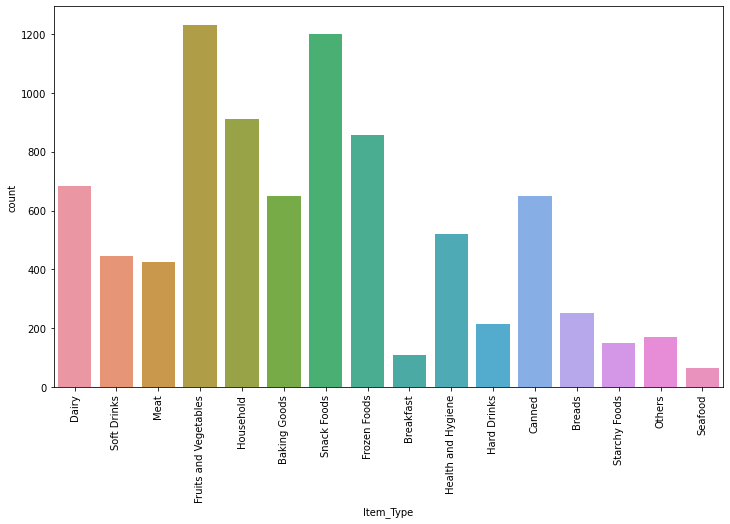

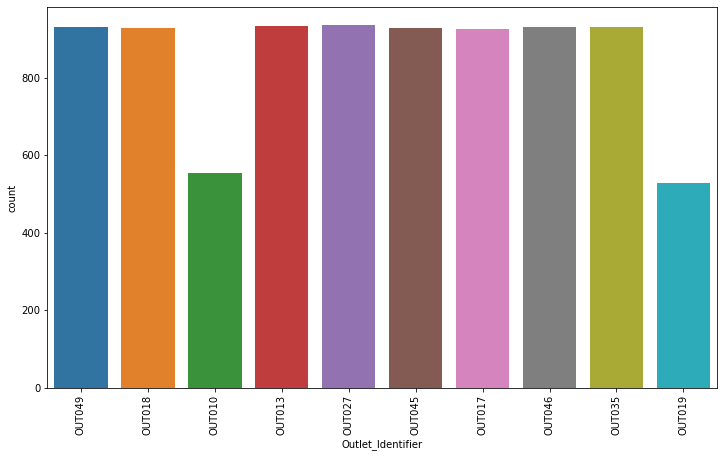

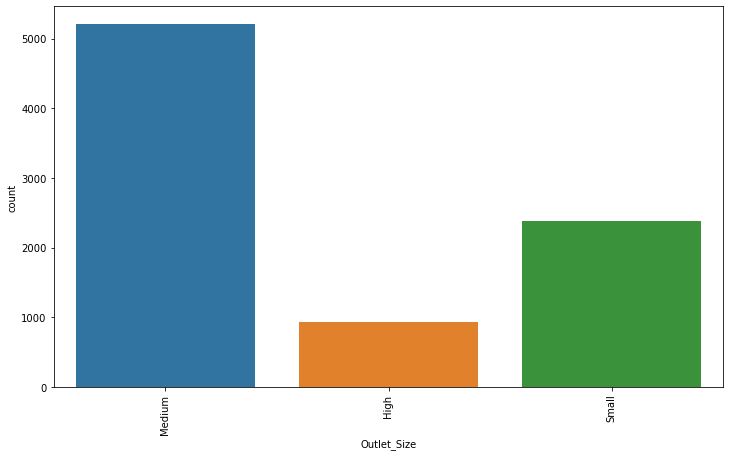

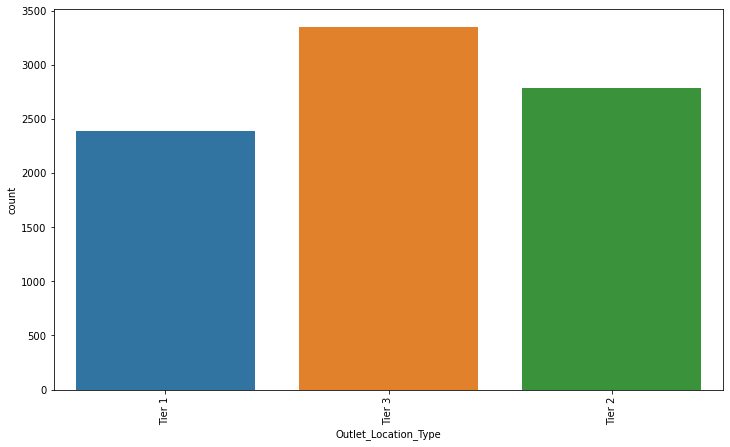

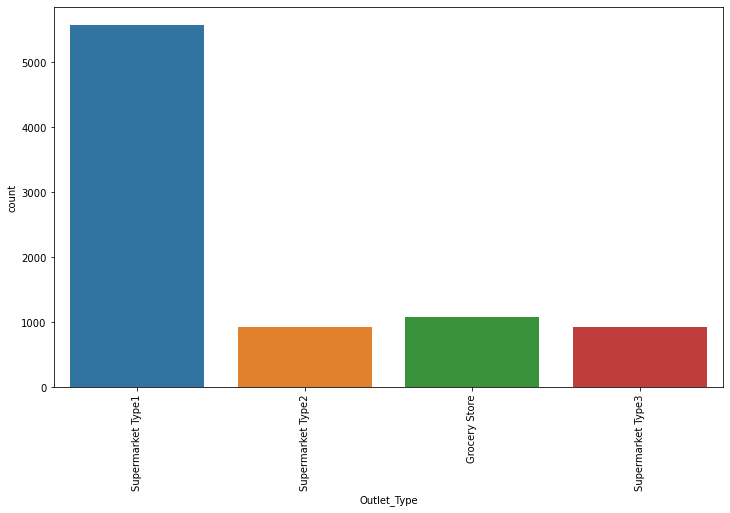

In [108]:
for i in df1.select_dtypes(include="object"):
    plt.figure(figsize=(12,7))
    ax=sns.countplot(df[i])
    ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
    plt.show()

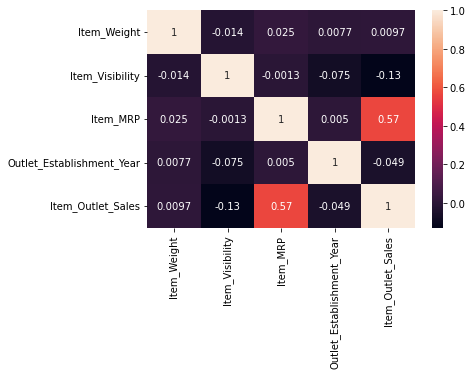

In [109]:
sns.heatmap(df.corr(),annot=True)
plt.show()

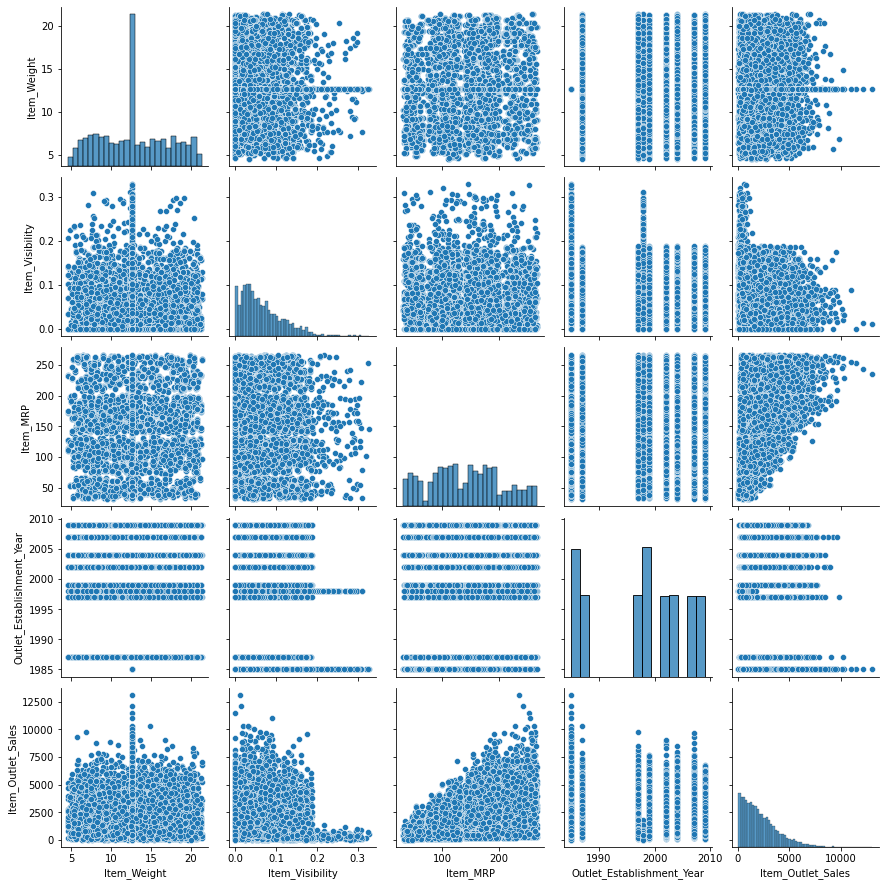

In [110]:
sns.pairplot(df)
plt.show()

In [111]:
 best_stores=df.groupby(['Item_Identifier'], as_index=False)['Item_Outlet_Sales'].sum()

In [112]:
 best_scores=best_stores.sort_values("Item_Outlet_Sales",ascending=False)

In [113]:
top_10=best_scores.iloc[:10,:]
x=top_10["Item_Identifier"]
y=top_10["Item_Outlet_Sales"]

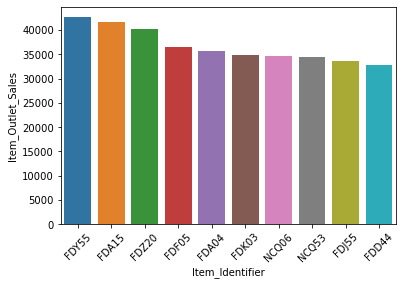

In [114]:
# Top 10 Item Identifier according to outlet_sales
fig, ax=plt.subplots()
ax=sns.barplot(x=x,y=y,data=top_10)
ax=plt.xticks(rotation=45)

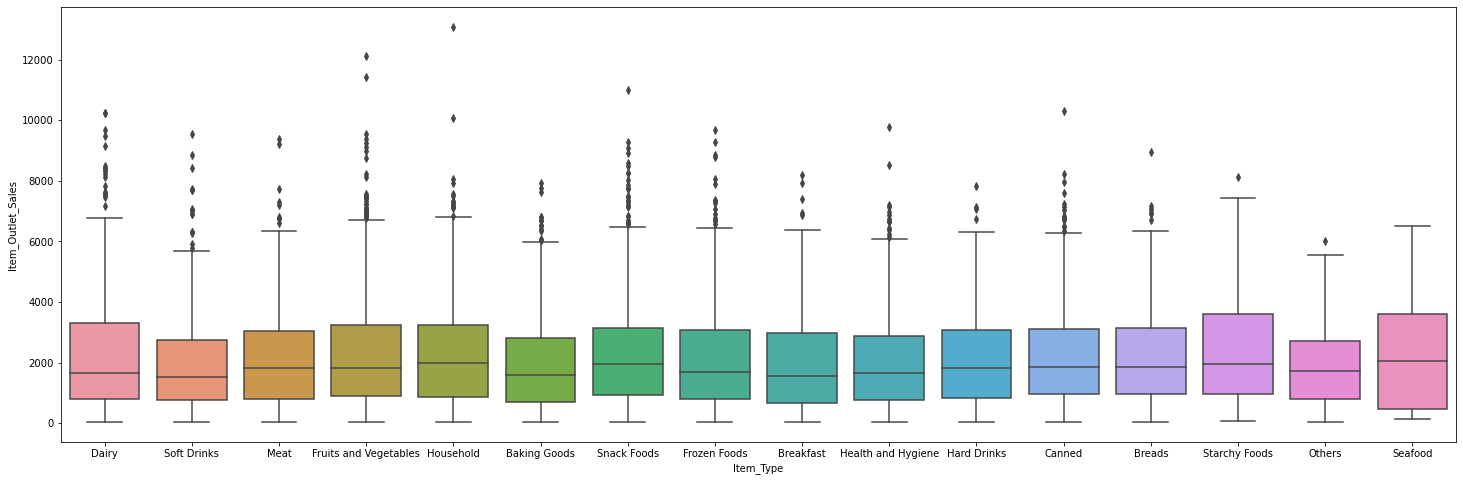

In [115]:
f, ax = plt.subplots(figsize=(25, 8))
fig = sns.boxplot(x="Item_Type", y="Item_Outlet_Sales", data=df) 


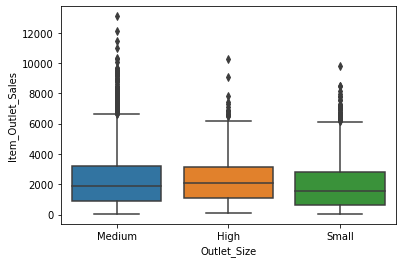

In [116]:
sns.boxplot(x = 'Outlet_Size', y = 'Item_Outlet_Sales', data = df)
plt.show()

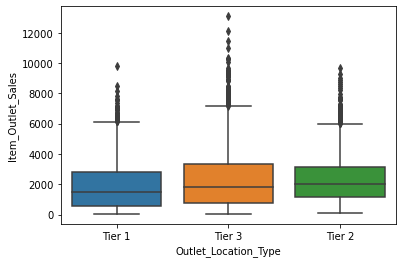

In [117]:
sns.boxplot(x = 'Outlet_Location_Type', y = 'Item_Outlet_Sales', data = df)
plt.show()

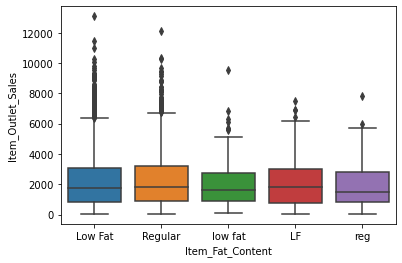

In [118]:
sns.boxplot(x = 'Item_Fat_Content', y = 'Item_Outlet_Sales', data = df)

plt.show()

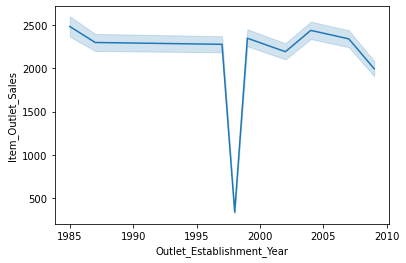

In [119]:
sns.lineplot(x="Outlet_Establishment_Year",y="Item_Outlet_Sales",data=df)
plt.show()

In [120]:
df.Item_Identifier.unique

<bound method Series.unique of 0       FDA15
1       DRC01
2       FDN15
3       FDX07
4       NCD19
        ...  
8518    FDF22
8519    FDS36
8520    NCJ29
8521    FDN46
8522    DRG01
Name: Item_Identifier, Length: 8523, dtype: object>

# feature Engineering

In [121]:
df[df.Item_MRP<0] # so no negative price hence Item_MRP is correct

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales


In [122]:
df.replace({'Item_Fat_Content': {'low fat':'Low Fat','LF':'Low Fat', 'reg':'Regular'}}, inplace=True)

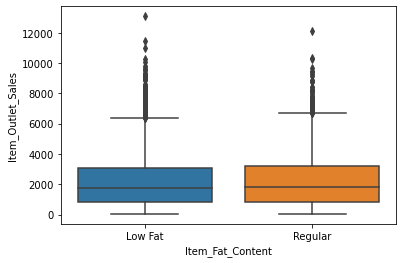

In [123]:
sns.boxplot(x = 'Item_Fat_Content', y = 'Item_Outlet_Sales', data = df)

plt.show()


In [124]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [125]:
from sklearn.preprocessing import LabelEncoder

In [126]:
le=LabelEncoder()
cat=[i for i in df.select_dtypes(include="object")]
for i in cat:
    df[i]=le.fit_transform(df[i])



In [127]:
data=df.copy()
data=data.drop(columns=['Outlet_Establishment_Year', 'Item_Identifier', 'Outlet_Identifier'])
data.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,0,0.016047,4,249.8092,1,0,1,3735.1380
1,5.92,1,0.019278,14,48.2692,1,2,2,443.4228
2,17.50,0,0.016760,10,141.6180,1,0,1,2097.2700
3,19.20,1,0.000000,6,182.0950,1,2,0,732.3800
4,8.93,0,0.000000,9,53.8614,0,2,1,994.7052


In [128]:
X=data.iloc[:,:-1]
X.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,9.30,0,0.016047,4,249.8092,1,0,1
1,5.92,1,0.019278,14,48.2692,1,2,2
2,17.50,0,0.016760,10,141.6180,1,0,1
3,19.20,1,0.000000,6,182.0950,1,2,0
4,8.93,0,0.000000,9,53.8614,0,2,1


In [129]:
y=data.iloc[:,-1]
y.head()

0    3735.1380
1     443.4228
2    2097.2700
3     732.3800
4     994.7052
Name: Item_Outlet_Sales, dtype: float64

In [130]:
from sklearn.model_selection import train_test_split

In [131]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [132]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error


In [133]:
rfc=RandomForestRegressor(random_state=42,)

In [196]:
param_grid = { 
     'n_estimators': [100,200,300,500,1000],
     'criterion' : ["squared_error", "absolute_error", "poisson"],
     'max_features': ['auto', 'sqrt', 'log2'],
     'max_depth' : [4,5,6,7,8],
     'min_samples_split':[2,3,4,5,6],
     'min_samples_leaf':[1,2,3,4,5]


}



In [197]:
CV_rfc =RandomizedSearchCV(estimator=rfc, param_distributions=param_grid, cv= 5,n_iter=10,scoring="neg_mean_squared_error",random_state=42,verbose=2)
CV_rfc.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END criterion=squared_error, max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=4, n_estimators=100; total time=   0.5s
[CV] END criterion=squared_error, max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=4, n_estimators=100; total time=   0.4s
[CV] END criterion=squared_error, max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=4, n_estimators=100; total time=   0.5s
[CV] END criterion=squared_error, max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=4, n_estimators=100; total time=   0.5s
[CV] END criterion=squared_error, max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=4, n_estimators=100; total time=   0.5s
[CV] END criterion=poisson, max_depth=8, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.3s
[CV] END criterion=poisson, max_depth=8, max_features=sqrt, min_samples_leaf=1, m

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'criterion': ['squared_error',
                                                      'absolute_error',
                                                      'poisson'],
                                        'max_depth': [4, 5, 6, 7, 8],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 3, 4, 5],
                                        'min_samples_split': [2, 3, 4, 5, 6],
                                        'n_estimators': [100, 200, 300, 500,
                                                         1000]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [208]:
y_pred = CV_rfc.predict(X_test)
mae = mean_absolute_error(y_test,y_pred)
print("MAE : ", mae)

MAE :  737.3066354761166


In [218]:
CV_rfc.best_params_

{'n_estimators': 200,
 'min_samples_split': 5,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 5,
 'criterion': 'squared_error'}

In [210]:
rfc1=RandomForestRegressor(n_estimators= 200,max_depth=7, max_features= 'auto',min_samples_split = 5,
 min_samples_leaf= 5,random_state=42)

In [211]:
rfc1.fit(X_train,y_train)

RandomForestRegressor(max_depth=7, min_samples_leaf=5, min_samples_split=5,
                      n_estimators=200, random_state=42)

In [212]:
rfc1.score(X_test,y_test)

0.6009255083672433

In [213]:
y_pred=rfc1.predict(X_test)
y_pred

array([1164.30175078,  677.06082516,  664.9284032 , ...,  508.40345533,
       2073.254269  , 3929.140161  ])

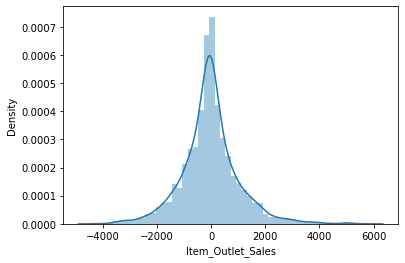

In [214]:
sns.distplot(y_test-y_pred)
plt.show()

In [215]:
df=pd.DataFrame(y_test,)
df["predicted"]=y_pred
df.head()

,Item_Outlet_Sales,predicted
7503,1743.0644,1164.301751
2957,356.8688,677.060825
7031,377.5086,664.928403
1084,5778.4782,4892.122184
856,2356.9320,3152.381607


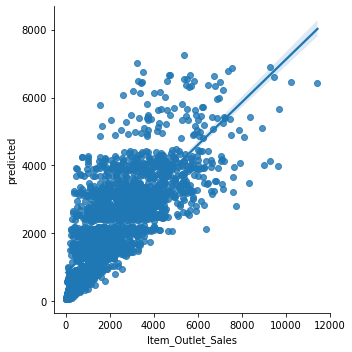

In [216]:
sns.lmplot(x="Item_Outlet_Sales",y="predicted",data=df)
plt.show()

In [221]:
import pickle
file=open('StoreSales.pkl','wb')
pickle.dump(rfc1,file)